In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Carnegie Classification vs IC Clusters

In [136]:
school_directory = pd.read_csv("../datasets/IPEDS_Dataset_Encoded/Institutional Characteristics/HD_2015-2021_data.csv", index_col = 0)

/tmp/ipykernel_13959/3025782251.py:1: DtypeWarning: Columns (13,23,48,49,50,51,52,53,54,70,71,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  school_directory = pd.read_csv("../datasets/IPEDS_Dataset_Encoded/Institutional Characteristics/HD_2015-2021_data.csv", index_col = 0)


In [137]:
school_directory = school_directory[["instnm", "c15basic", "year"]]

In [138]:
school_directory = school_directory[school_directory['c15basic'].notna()]
school_directory.sort_values(by="year", inplace=True)

In [139]:
ic_clusters_mca = pd.read_csv("../datasets/Clusters/IC_CLUSTERS_AND_MCA.csv",index_col= 0)

In [140]:
carnegie_ic_merged = pd.merge(ic_clusters_mca, school_directory, how = "inner", on = "unitid")

In [141]:
le = LabelEncoder()
carnegie_ic_merged['carnegie'] = le.fit_transform(carnegie_ic_merged['c15basic'].values)

In [142]:
carnegie_ic_merged

,ic_cluster,0,1,2,3,4,5,6,7,8,9,instnm,c15basic,year,carnegie
unitid,,,,,,,,,,,,,,,
100654,3,-0.064717,-0.323046,0.707188,0.679047,-0.197700,0.003017,-0.008454,-0.015410,0.069654,0.013131,Alabama A & M University,Master's Colleges & Universities: Larger Programs,2015,16
100654,3,-0.064717,-0.323046,0.707188,0.679047,-0.197700,0.003017,-0.008454,-0.015410,0.069654,0.013131,Alabama A & M University,Master's Colleges & Universities: Larger Programs,2016,16
100654,3,-0.064717,-0.323046,0.707188,0.679047,-0.197700,0.003017,-0.008454,-0.015410,0.069654,0.013131,Alabama A & M University,Master's Colleges & Universities: Larger Programs,2017,16
100654,3,-0.064717,-0.323046,0.707188,0.679047,-0.197700,0.003017,-0.008454,-0.015410,0.069654,0.013131,Alabama A & M University,Master's Colleges & Universities: Larger Programs,2018,16
100654,3,-0.064717,-0.323046,0.707188,0.679047,-0.197700,0.003017,-0.008454,-0.015410,0.069654,0.013131,Alabama A & M University,Master's Colleges & Universities: Larger Programs,2019,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490805,3,-0.066952,-0.317610,0.736394,0.663763,-0.270854,0.001813,-0.002854,0.421949,-0.116915,-0.160626,Purdue University Northwest,Master's Colleges & Universities: Larger Programs,2019,16
490805,3,-0.066952,-0.317610,0.736394,0.663763,-0.270854,0.001813,-0.002854,0.421949,-0.116915,-0.160626,Purdue University Northwest,Master's Colleges & Universities: Larger Programs,2020,16
490805,3,-0.066952,-0.317610,0.736394,0.663763,-0.270854,0.001813,-0.002854,0.421949,-0.116915,-0.160626,Purdue University Northwest,Master's Colleges & Universities: Larger Programs,2021,16


In [143]:
from sklearn.model_selection import train_test_split
X, y = carnegie_ic_merged.iloc[:, :-4], carnegie_ic_merged.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [144]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [145]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"R^2: {r2_score(y_test, regr.predict(X_test))}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, regr.predict(X_test)))}")

R^2: 0.9481250319361282
RMSE: 1.906983016856772


Accuracy: 0.973993471164309


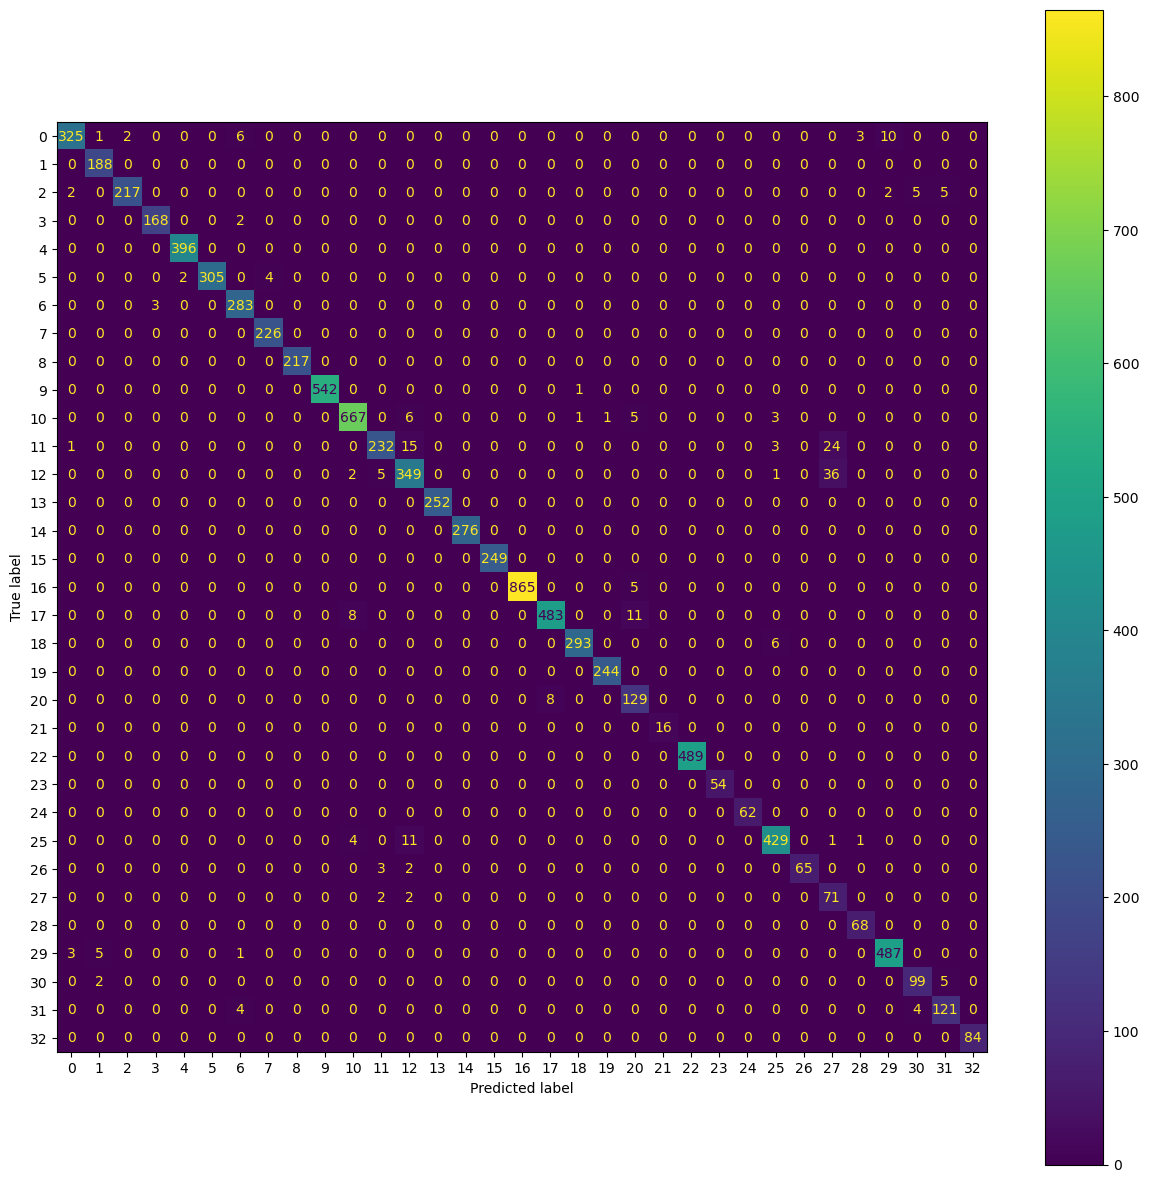

In [146]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test))}")

fig, ax = plt.subplots(1,1, figsize = (15, 15))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax)
plt.show()